## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -1.354424  1.215086  0.573879  1.819038  1.425524  0.814082
1  0.822086 -0.597323 -0.892281  0.736202  0.721288  0.946525
2  1.848187  0.629899  0.152183 -0.836586 -1.308101 -0.421667
3  0.776742 -0.983618  0.129859 -1.317297  0.398226 -1.344158
4 -1.120928  0.412281  0.523603  0.744914 -0.726158 -0.468014


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0076442	total: 57.9ms	remaining: 57.9s
1:	learn: 0.9994765	total: 58.5ms	remaining: 29.2s
2:	learn: 0.9903852	total: 59ms	remaining: 19.6s
3:	learn: 0.9806484	total: 59.6ms	remaining: 14.8s
4:	learn: 0.9717330	total: 60.1ms	remaining: 12s
5:	learn: 0.9629709	total: 60.6ms	remaining: 10s
6:	learn: 0.9527123	total: 61.2ms	remaining: 8.68s
7:	learn: 0.9431094	total: 61.7ms	remaining: 7.65s
8:	learn: 0.9355467	total: 62.4ms	remaining: 6.87s
9:	learn: 0.9259356	total: 63.1ms	remaining: 6.25s
10:	learn: 0.9166788	total: 63.6ms	remaining: 5.72s
11:	learn: 0.9071567	total: 64.2ms	remaining: 5.29s
12:	learn: 0.8975033	total: 64.8ms	remaining: 4.92s
13:	learn: 0.8897959	total: 65.3ms	remaining: 4.6s
14:	learn: 0.8820193	total: 65.7ms	remaining: 4.32s
15:	learn: 0.8740408	total: 66.2ms	remaining: 4.07s
16:	learn: 0.8654314	total: 66.7ms	remaining: 3.85s
17:	learn: 0.8567666	total: 67.1ms	remaining: 3.66s
18:	learn: 0.8488551	total: 67.6ms	remaining: 3.49s

101:	learn: 0.4028240	total: 109ms	remaining: 956ms
102:	learn: 0.3992299	total: 109ms	remaining: 952ms
103:	learn: 0.3960897	total: 110ms	remaining: 946ms
104:	learn: 0.3928873	total: 110ms	remaining: 940ms
105:	learn: 0.3901337	total: 111ms	remaining: 935ms
106:	learn: 0.3872049	total: 111ms	remaining: 929ms
107:	learn: 0.3842262	total: 112ms	remaining: 923ms
108:	learn: 0.3813659	total: 112ms	remaining: 918ms
109:	learn: 0.3783049	total: 113ms	remaining: 913ms
110:	learn: 0.3752728	total: 113ms	remaining: 909ms
111:	learn: 0.3722917	total: 114ms	remaining: 903ms
112:	learn: 0.3700091	total: 114ms	remaining: 898ms
113:	learn: 0.3671844	total: 115ms	remaining: 893ms
114:	learn: 0.3645044	total: 115ms	remaining: 888ms
115:	learn: 0.3615497	total: 116ms	remaining: 883ms
116:	learn: 0.3591203	total: 116ms	remaining: 879ms
117:	learn: 0.3567214	total: 117ms	remaining: 874ms
118:	learn: 0.3539926	total: 118ms	remaining: 874ms
119:	learn: 0.3508544	total: 119ms	remaining: 870ms
120:	learn: 

253:	learn: 0.1381972	total: 187ms	remaining: 550ms
254:	learn: 0.1372874	total: 188ms	remaining: 549ms
255:	learn: 0.1364399	total: 188ms	remaining: 548ms
256:	learn: 0.1354157	total: 189ms	remaining: 547ms
257:	learn: 0.1344440	total: 190ms	remaining: 545ms
258:	learn: 0.1335651	total: 190ms	remaining: 544ms
259:	learn: 0.1325874	total: 191ms	remaining: 543ms
260:	learn: 0.1316231	total: 191ms	remaining: 541ms
261:	learn: 0.1307429	total: 192ms	remaining: 540ms
262:	learn: 0.1298131	total: 192ms	remaining: 539ms
263:	learn: 0.1289523	total: 193ms	remaining: 537ms
264:	learn: 0.1283250	total: 193ms	remaining: 536ms
265:	learn: 0.1275408	total: 194ms	remaining: 534ms
266:	learn: 0.1267056	total: 194ms	remaining: 533ms
267:	learn: 0.1259231	total: 195ms	remaining: 532ms
268:	learn: 0.1250519	total: 195ms	remaining: 530ms
269:	learn: 0.1244119	total: 196ms	remaining: 529ms
270:	learn: 0.1235697	total: 196ms	remaining: 528ms
271:	learn: 0.1226591	total: 197ms	remaining: 526ms
272:	learn: 

463:	learn: 0.0482723	total: 292ms	remaining: 338ms
464:	learn: 0.0481203	total: 293ms	remaining: 337ms
465:	learn: 0.0480210	total: 293ms	remaining: 336ms
466:	learn: 0.0478706	total: 294ms	remaining: 335ms
467:	learn: 0.0476607	total: 294ms	remaining: 335ms
468:	learn: 0.0475184	total: 295ms	remaining: 334ms
469:	learn: 0.0474209	total: 295ms	remaining: 333ms
470:	learn: 0.0472162	total: 296ms	remaining: 332ms
471:	learn: 0.0470701	total: 296ms	remaining: 331ms
472:	learn: 0.0469743	total: 297ms	remaining: 330ms
473:	learn: 0.0467359	total: 297ms	remaining: 330ms
474:	learn: 0.0465520	total: 298ms	remaining: 329ms
475:	learn: 0.0463009	total: 298ms	remaining: 328ms
476:	learn: 0.0461210	total: 299ms	remaining: 328ms
477:	learn: 0.0458909	total: 299ms	remaining: 327ms
478:	learn: 0.0457515	total: 300ms	remaining: 326ms
479:	learn: 0.0455766	total: 300ms	remaining: 325ms
480:	learn: 0.0453240	total: 301ms	remaining: 325ms
481:	learn: 0.0450999	total: 302ms	remaining: 324ms
482:	learn: 

618:	learn: 0.0261085	total: 371ms	remaining: 228ms
619:	learn: 0.0259506	total: 371ms	remaining: 227ms
620:	learn: 0.0258429	total: 372ms	remaining: 227ms
621:	learn: 0.0257539	total: 372ms	remaining: 226ms
622:	learn: 0.0256659	total: 372ms	remaining: 225ms
623:	learn: 0.0255790	total: 373ms	remaining: 225ms
624:	learn: 0.0254790	total: 373ms	remaining: 224ms
625:	learn: 0.0253943	total: 374ms	remaining: 223ms
626:	learn: 0.0252426	total: 374ms	remaining: 223ms
627:	learn: 0.0251401	total: 375ms	remaining: 222ms
628:	learn: 0.0250556	total: 375ms	remaining: 221ms
629:	learn: 0.0249721	total: 376ms	remaining: 221ms
630:	learn: 0.0248896	total: 376ms	remaining: 220ms
631:	learn: 0.0248023	total: 376ms	remaining: 219ms
632:	learn: 0.0247211	total: 377ms	remaining: 219ms
633:	learn: 0.0246227	total: 377ms	remaining: 218ms
634:	learn: 0.0245422	total: 378ms	remaining: 217ms
635:	learn: 0.0244626	total: 378ms	remaining: 216ms
636:	learn: 0.0243840	total: 379ms	remaining: 216ms
637:	learn: 

833:	learn: 0.0111728	total: 476ms	remaining: 94.7ms
834:	learn: 0.0111210	total: 476ms	remaining: 94.2ms
835:	learn: 0.0110735	total: 477ms	remaining: 93.5ms
836:	learn: 0.0110162	total: 477ms	remaining: 92.9ms
837:	learn: 0.0109651	total: 478ms	remaining: 92.3ms
838:	learn: 0.0109390	total: 478ms	remaining: 91.7ms
839:	learn: 0.0108928	total: 479ms	remaining: 91.2ms
840:	learn: 0.0108410	total: 479ms	remaining: 90.6ms
841:	learn: 0.0108197	total: 480ms	remaining: 90ms
842:	learn: 0.0107702	total: 480ms	remaining: 89.4ms
843:	learn: 0.0107257	total: 481ms	remaining: 88.8ms
844:	learn: 0.0106774	total: 481ms	remaining: 88.2ms
845:	learn: 0.0106565	total: 481ms	remaining: 87.6ms
846:	learn: 0.0106043	total: 482ms	remaining: 87ms
847:	learn: 0.0105661	total: 482ms	remaining: 86.5ms
848:	learn: 0.0105414	total: 483ms	remaining: 85.9ms
849:	learn: 0.0104985	total: 483ms	remaining: 85.3ms
850:	learn: 0.0104611	total: 484ms	remaining: 84.7ms
851:	learn: 0.0104087	total: 484ms	remaining: 84.2

990:	learn: 0.0061811	total: 554ms	remaining: 5.03ms
991:	learn: 0.0061613	total: 555ms	remaining: 4.47ms
992:	learn: 0.0061456	total: 555ms	remaining: 3.91ms
993:	learn: 0.0061112	total: 556ms	remaining: 3.35ms
994:	learn: 0.0060794	total: 556ms	remaining: 2.79ms
995:	learn: 0.0060517	total: 557ms	remaining: 2.23ms
996:	learn: 0.0060326	total: 557ms	remaining: 1.68ms
997:	learn: 0.0060106	total: 557ms	remaining: 1.12ms
998:	learn: 0.0059970	total: 558ms	remaining: 558us
999:	learn: 0.0059702	total: 558ms	remaining: 0us


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

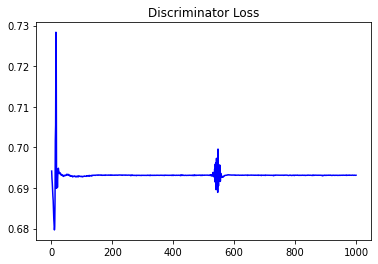

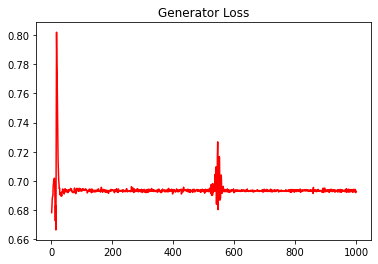

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.07708285482265442


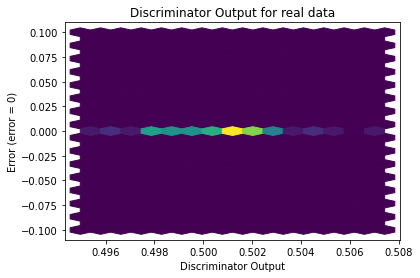

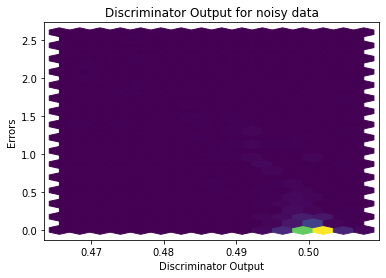

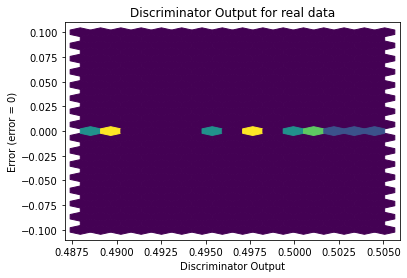

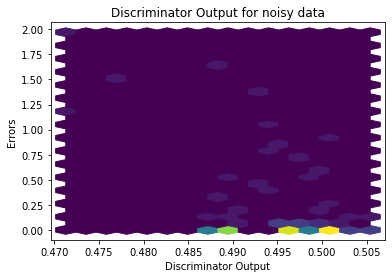

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


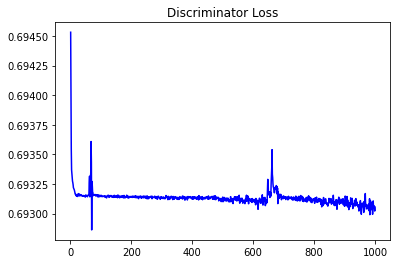

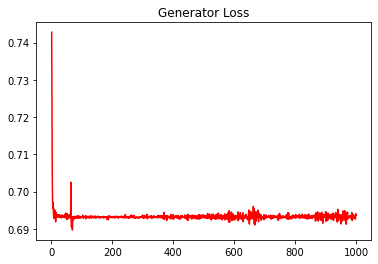

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.10688780223076218


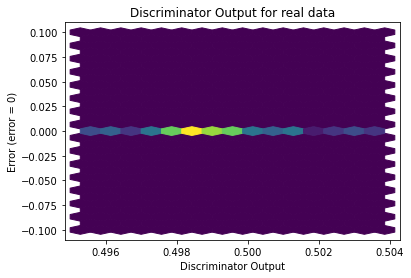

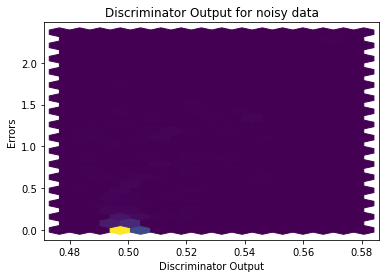

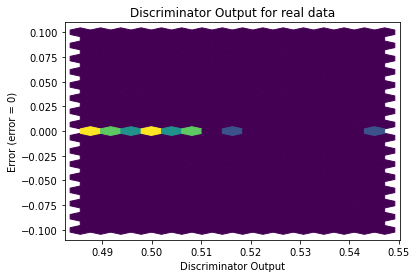

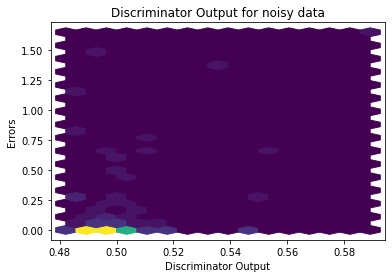

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], requires_grad=True)
